In [1]:
# Импортируем библиотеки и данные
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ny_housing = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/NY-House-Dataset.csv")
df = ny_housing[ny_housing['PRICE'] <= 200000000]
df.shape

(4800, 17)

In [2]:
df.head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109


### Задание 1.1 Построить разные графики и сделать 6 выводов
На этом этапе нам нужно выявить с помощью визуализаций разные паттерны и зависимости, распределение значений внутри переменных.

Создайте 6 визуализаций разных видов. Можно использовать графики из галерей Matplotlib или Seaborn. Полученные графики отобразите и сохраните в отдельные переменные.

Каждый график должен иметь все стандартные аттрибуты - подписи осей, название и другие необходимые детали.

NB: Визуализация должна иметь смысл и нести новую информацию.

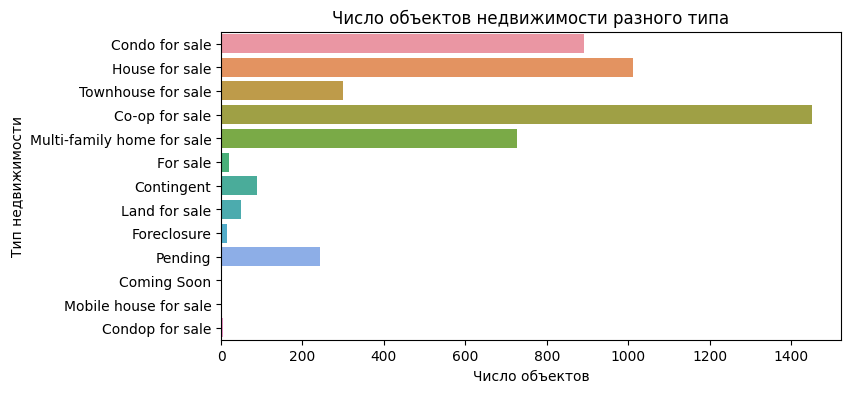

In [3]:
# Построим распределение обхъектов недвижимости по типам.
# Самые популярные типы недвижимости  - многоквартирные, при этом преобладают кооперативы.
# Наименее представлены таунхаусы.
# У части объектов (For sale, Contingent, Foreclosure, Pending) тип неопределен (их исключим для некоторых визуализаций для наглядности)
# Продажа земли встречается довольно редко, а мобильные дома почти отсутствуют.

plt.figure(figsize=(8, 4))
ax1 = sns.countplot(df, y='TYPE')
ax1.set_title('Число объектов недвижимости разного типа')
ax1.set_xlabel('Число объектов')
ax1.set_ylabel('Тип недвижимости')
plt.show()

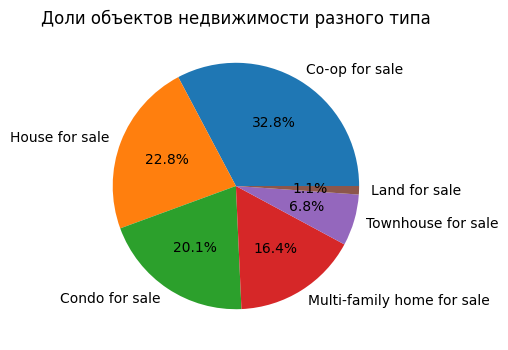

In [4]:
# Ограничим выборку крупнейшими типами

df_ltd = df[df['TYPE'].isin(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'Land for sale', 'Mobile house for sale'])]

plt.figure(figsize=(8, 4))
plt.pie(df_ltd['TYPE'].value_counts().head(6), \
    labels=df_ltd['TYPE'].value_counts().head(6).index, \
        autopct='%1.1f%%')
plt.title('Доли объектов недвижимости разного типа')
plt.show()

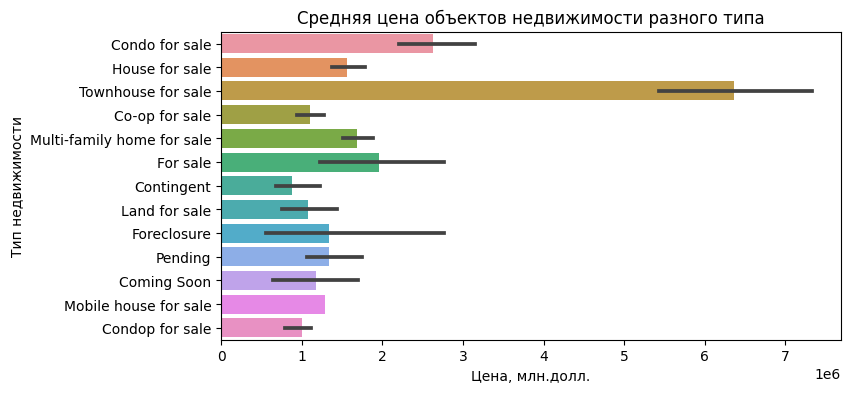

In [5]:
# Самый дорогой тип недвижимости - таунхаусы, самый дешевый - кооперативы (даже дешевле мобильных домов).
# Судя по средней стоимости Condop - они все же ближе к кооперативам, чем к кондоминиумам.
# Мобильные дома вероятно довольно близки по своим характеристикам, поскольку мы не видим по ним разброса цен.

plt.figure(figsize=(8, 4))
sns.barplot(df, x='PRICE', y='TYPE', estimator='mean', orient='h')
plt.title('Средняя цена объектов недвижимости разного типа')
plt.xlabel('Цена, млн.долл.')
plt.ylabel('Тип недвижимости')
plt.show()

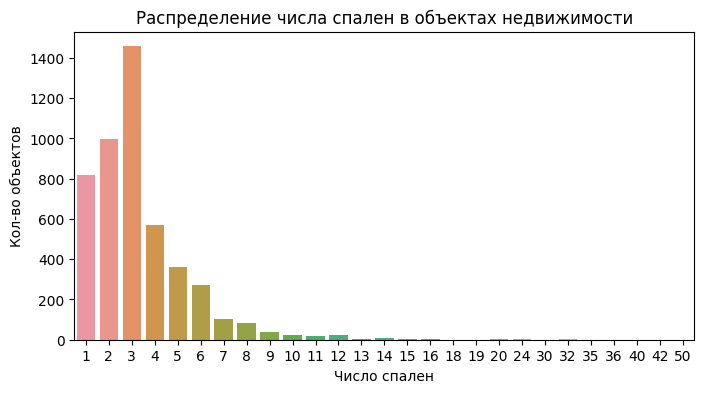

In [6]:
# Посмотрим на распределение апартаментов по числу спален.
# Чаще всего встречаются апартаменты с 3мя спальнями, далее идут 2-х и 1-комнатные апартаменты. Больше 12 спален имеют единичные объекты.
plt.figure(figsize=(8, 4))
sns.countplot(df, x='BEDS')
plt.title('Распределение числа спален в объектах недвижимости')
plt.xlabel('Число спален')
plt.ylabel('Кол-во объектов')
plt.show()

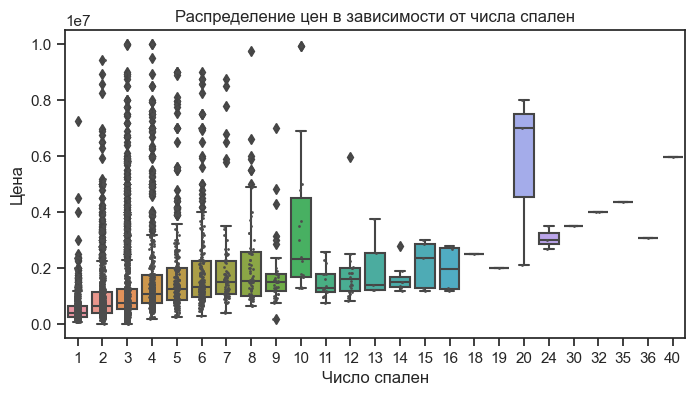

In [7]:
# Средняя цена устойчиво растет с увеличение кол-ва спален до 4. Но дальше цена начинает больше зависеть от других факторов.
# Также можно видеть, что наибольшая вариативность цен характерна для маленьких объектов.

sns.set_theme(style="ticks")
plt.figure(figsize=(8, 4))
sns.boxplot(x='BEDS', y='PRICE', data=df[df['PRICE'] < 10_000_000])
sns.stripplot(data=df[df['PRICE'] < 10_000_000], x='BEDS', y='PRICE', size=2, color=".3")
plt.xlabel('Число спален')
plt.ylabel('Цена')
plt.title('Распределение цен в зависимости от числа спален')
plt.show()

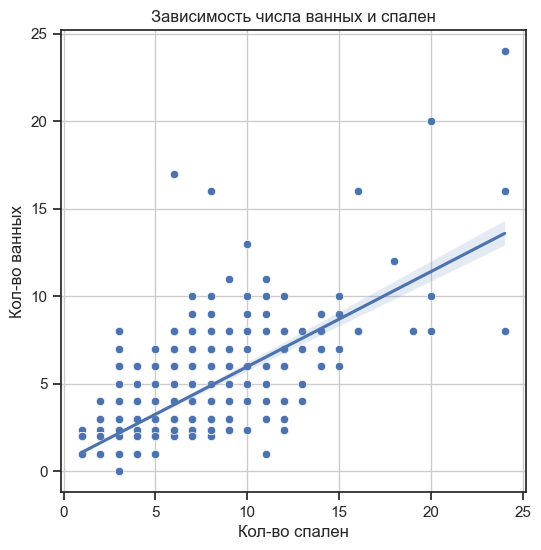

In [8]:
# Обычно число ванн меньше, чем число спален, но на графики видны обратные примеры. 
# Это странно, скорее всего имеет место неверный ввод данных: например, едва ли реальный объект может иметь 8 ванн на 3 спальни.

plt.figure(figsize=(6, 6))
sns.scatterplot(data = df[(df['BEDS'] < 30) & (df['BATH'] < 30)], x='BEDS', y='BATH')
sns.regplot(data = df[(df['BEDS'] < 30) & (df['BATH'] < 30)], x='BEDS', y='BATH', scatter=False)
plt.title('Зависимость числа ванных и спален')
plt.xlabel('Кол-во спален')
plt.ylabel('Кол-во ванных')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


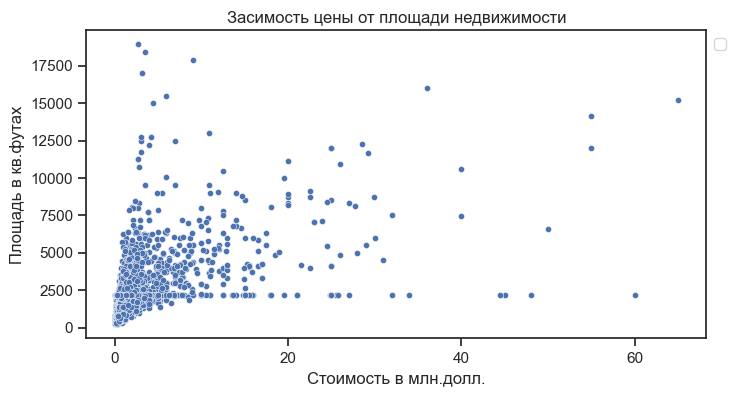

In [9]:
# Построим диаграмму рассеивания для зависимости стоимости недвижимости от площади

plt.figure(figsize=(8, 4))
sns.scatterplot(data = df[(df['PROPERTYSQFT'] < 20_000) & (df['PRICE'] < 100_000_000)], \
    x='PRICE', y='PROPERTYSQFT', s=20)
plt.xticks([0, 20_000_000, 40_000_000, 60_000_000], ['0', '20', '40', '60'])
plt.title('Засимость цены от площади недвижимости')
plt.xlabel('Стоимость в млн.долл.')
plt.ylabel('Площадь в кв.футах')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [10]:
# В данных виден странный разброс цен по апартаментам одинаковой площади (2184.207862 кв.фт.) по абсолютно разным ценам
# При работе с реальным датасетом, данные значения следовало бы удалить.

df[(df['PROPERTYSQFT'] < 2200) & (df['PROPERTYSQFT'] > 2150)]['PROPERTYSQFT'].value_counts().head()

2184.207862    1621
2160.000000      11
2185.000000       4
2194.000000       2
2192.000000       2
Name: PROPERTYSQFT, dtype: int64

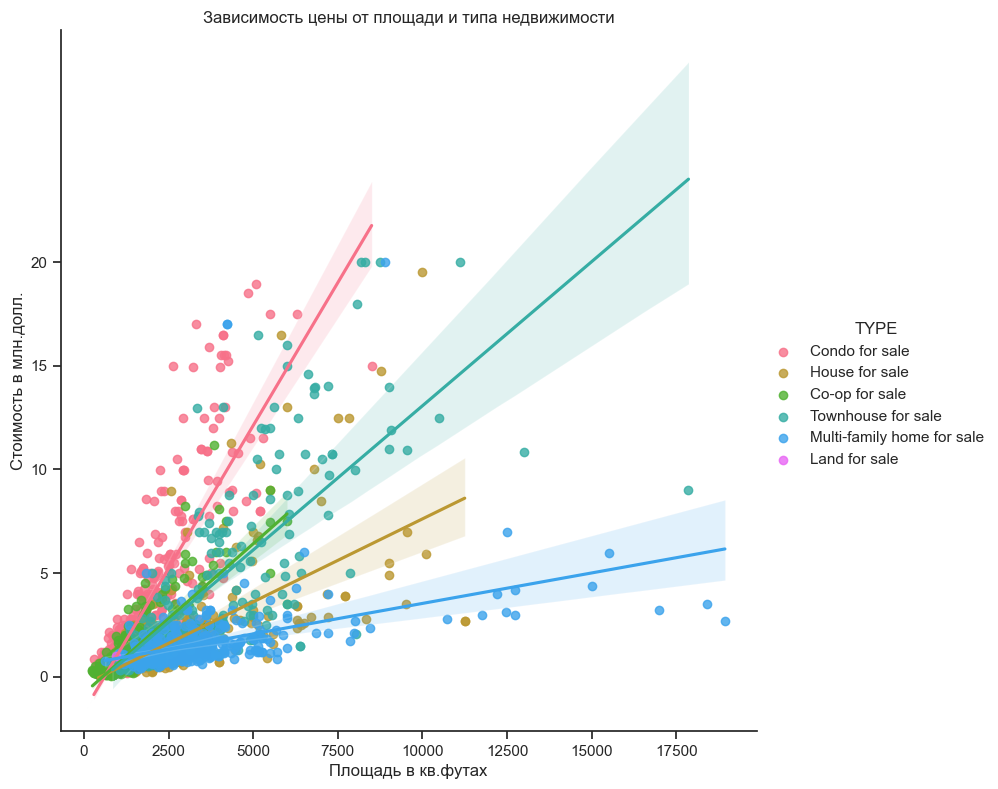

In [11]:
# Самый дешевый тип недвижимости в пересчете на кв.фт. - мультисемейные дома.
# Кондоминиумы при самой небольшой площади имеют относительно высокую цену, кроме того их цена растет быстрее всего с ростом площади
# Кооперативы маленькие по площади и недорогие
# Таунхаусы - относительно дорогая недвижимость с большими площадями

sns.lmplot(data = df_ltd[(df_ltd['PROPERTYSQFT'] < 20_000) & (df_ltd['PRICE'] < 20_000_000) & (df_ltd['PROPERTYSQFT'] != 2184.207862)], \
    x='PROPERTYSQFT', y='PRICE', hue='TYPE', palette='husl', markers='o', height=8)
plt.yticks([0, 5_000_000, 10_000_000, 15_000_000, 20_000_000], ['0', '5', '10', '15', '20'])
plt.title('Зависимость цены от площади и типа недвижимости')
plt.xlabel('Площадь в кв.футах')
plt.ylabel('Стоимость в млн.долл.')
plt.show()

C:\Users\nykmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


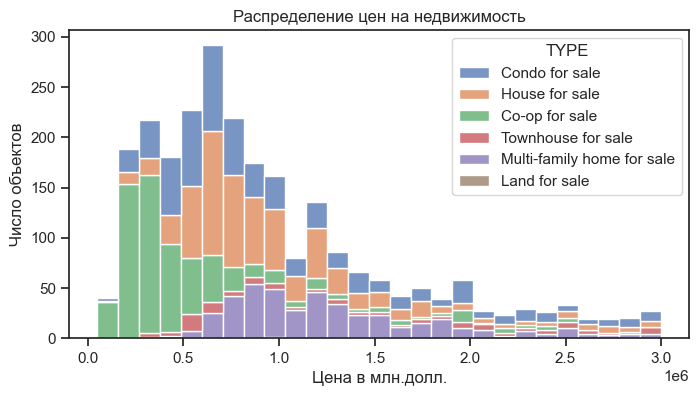

In [12]:
# Больше всего дешевой недвжимости в кооперативах, дома - более дорогой сегмент, мультисемейные дома - еще более дорогой тип недвижимости
# Кондоминиумы имеют наибольшую вариативность цен

plt.figure(figsize=(8, 4))
sns.histplot(data=df_ltd[(df_ltd['PRICE'] < 3_000_000) & (df_ltd['PROPERTYSQFT'] != 2184.207862)], \
    x='PRICE', hue='TYPE', multiple="stack")
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена в млн.долл.')
plt.ylabel('Число объектов')
plt.show()

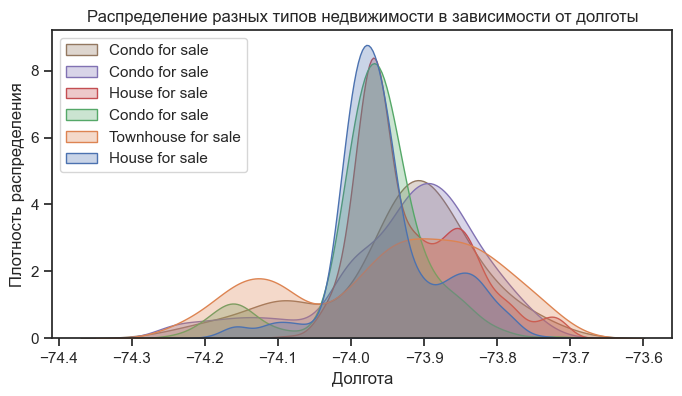

In [13]:
# В разных районах имеет место распространение разных типов недвижимости, это хорошо видно на графике зависимости расположения объектов по долготе.

plt.figure(figsize=(8, 4))
sns.kdeplot(
   data=df_ltd, x="LONGITUDE", hue="TYPE",
   fill=True, common_norm=False, 
   alpha=.3, linewidth=1, 
   warn_singular=False
)
plt.title('Распределение разных типов недвижимости в зависимости от долготы')
plt.xlabel('Долгота')
plt.ylabel('Плотность распределения')
plt.legend(df["TYPE"], loc='upper left')
plt.show()

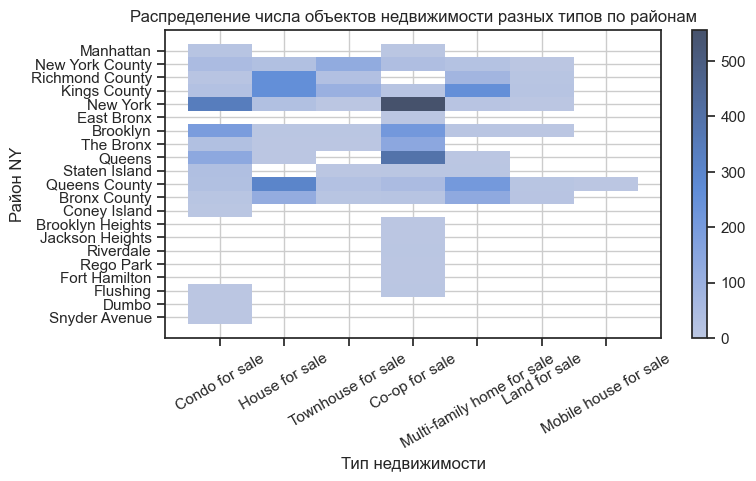

In [14]:
# ПОстроим график плотности разных типов застройки по районам.
# На Манхэттене встречаются только кондо и кооперативы, а мобильные дома продаются только в Квинсе

plt.figure(figsize=(8, 4))
sns.histplot(data = df_ltd, \
    x='TYPE', y='SUBLOCALITY',
    cbar=True)
plt.xticks(rotation=30)
plt.title('Распределение числа объектов недвижимости разных типов по районам')
plt.xlabel('Тип недвижимости')
plt.ylabel('Район NY')
plt.grid()
plt.show()

### Задание 1.2 Сбор дашборда
В рамках модуля мы научились использовать функцию plt.subplots для создания "полотна" с целью отображения нескольких графиков на одном поле. Создайте полотно размером 3x2 (три строки и два столбца). На этом полотне изобразите все графики, которые ранее были созданы в Задании 1.1.

C:\Users\nykmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


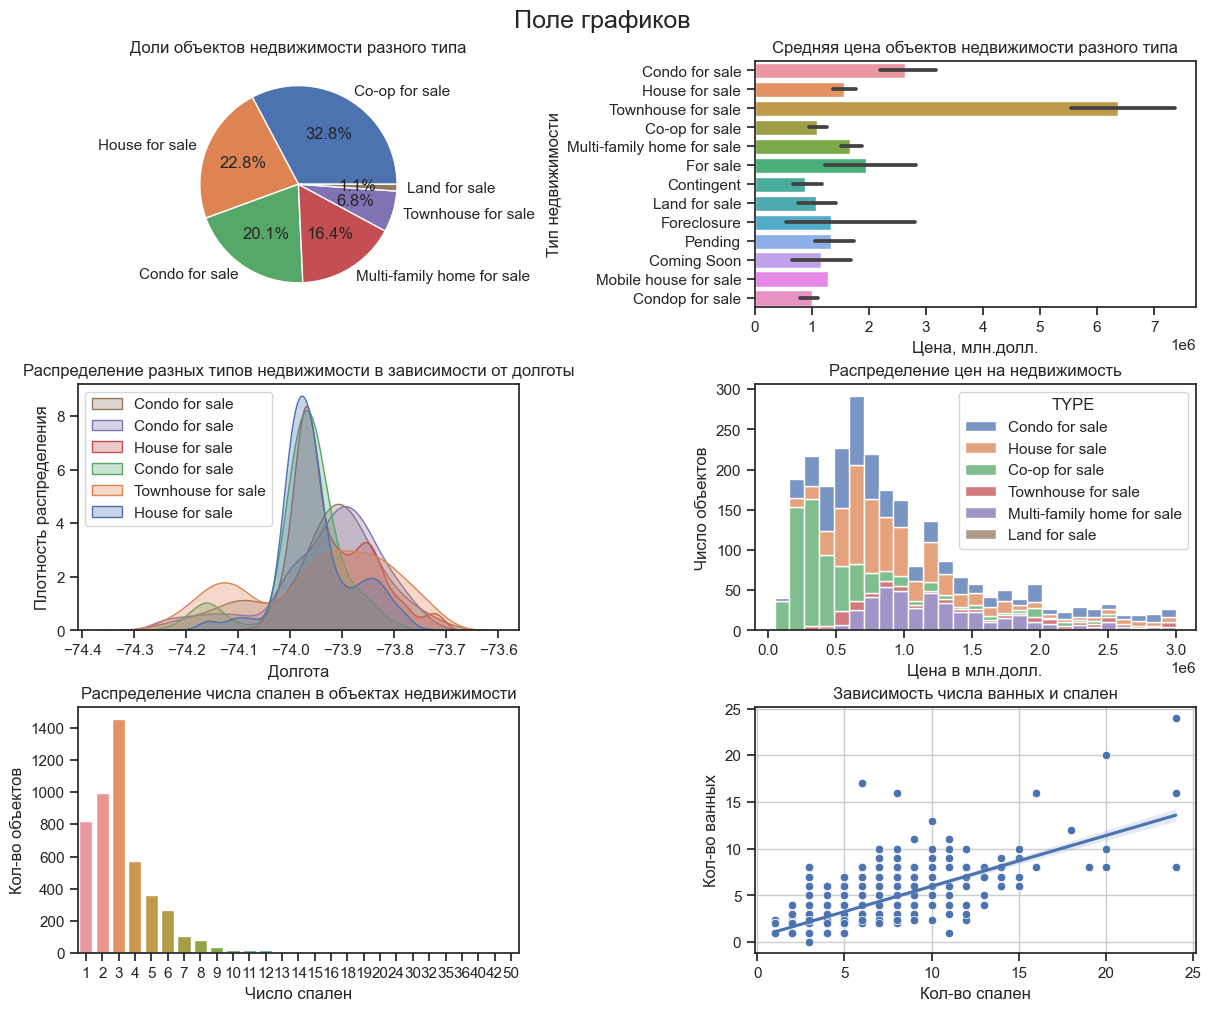

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10), layout="constrained")

fig.suptitle('Поле графиков ', fontsize=18) # Установка названия для всего поля


# Первый график
axs[0, 0].pie(df_ltd['TYPE'].value_counts().head(6), \
    labels=df_ltd['TYPE'].value_counts().head(6).index, \
        autopct='%1.1f%%')
axs[0, 0].set_title('Доли объектов недвижимости разного типа')

# Второй график
sns.barplot(df, x='PRICE', y='TYPE', orient='h', ax=axs[0, 1])
axs[0, 1].set_title('Средняя цена объектов недвижимости разного типа')
axs[0, 1].set_xlabel('Цена, млн.долл.')
axs[0, 1].set_ylabel('Тип недвижимости')

# Третий график
sns.kdeplot(
   data=df_ltd, x="LONGITUDE", hue="TYPE",
   fill=True, common_norm=False, 
   alpha=.3, linewidth=1, 
   warn_singular=False, 
   ax=axs[1, 0]
)
axs[1, 0].set_title('Распределение разных типов недвижимости в зависимости от долготы')
axs[1, 0].set_xlabel('Долгота')
axs[1, 0].set_ylabel('Плотность распределения')
axs[1, 0].legend(df_ltd['TYPE'], loc="upper left",)

# Четвертый график
sns.histplot(data=df_ltd[(df_ltd['PRICE'] < 3_000_000) & (df_ltd['PROPERTYSQFT'] != 2184.207862)], \
    x='PRICE', hue='TYPE', multiple="stack", ax=axs[1, 1])
axs[1, 1].set_title('Распределение цен на недвижимость')
axs[1, 1].set_xlabel('Цена в млн.долл.')
axs[1, 1].set_ylabel('Число объектов')

# Пятый график
sns.countplot(df, x='BEDS', ax=axs[2, 0])
axs[2, 0].set_title('Распределение числа спален в объектах недвижимости')
axs[2, 0].set_xlabel('Число спален')
axs[2, 0].set_ylabel('Кол-во объектов')


# Шестой график
sns.scatterplot(data = df[(df['BEDS'] < 30) & (df['BATH'] < 30)], x='BEDS', y='BATH', ax=axs[2, 1])
sns.regplot(data = df[(df['BEDS'] < 30) & (df['BATH'] < 30)], x='BEDS', y='BATH', scatter=False, ax=axs[2, 1])
axs[2, 1].set_title('Зависимость числа ванных и спален')
axs[2, 1].set_xlabel('Кол-во спален')
axs[2, 1].set_ylabel('Кол-во ванных')
axs[2, 1].grid()

plt.show()

### Задание 1.4 Как район влияет на стоимость жилья?
В наших данных есть столбец TYPE, отвечающий за тип проданной недвижимости (квартира, дом, таунхаус и т.д.).

Создайте barplot, на котором будет показана средняя стоимость недвижимости разных типов в New York County (столбец SUBLOCALITY).

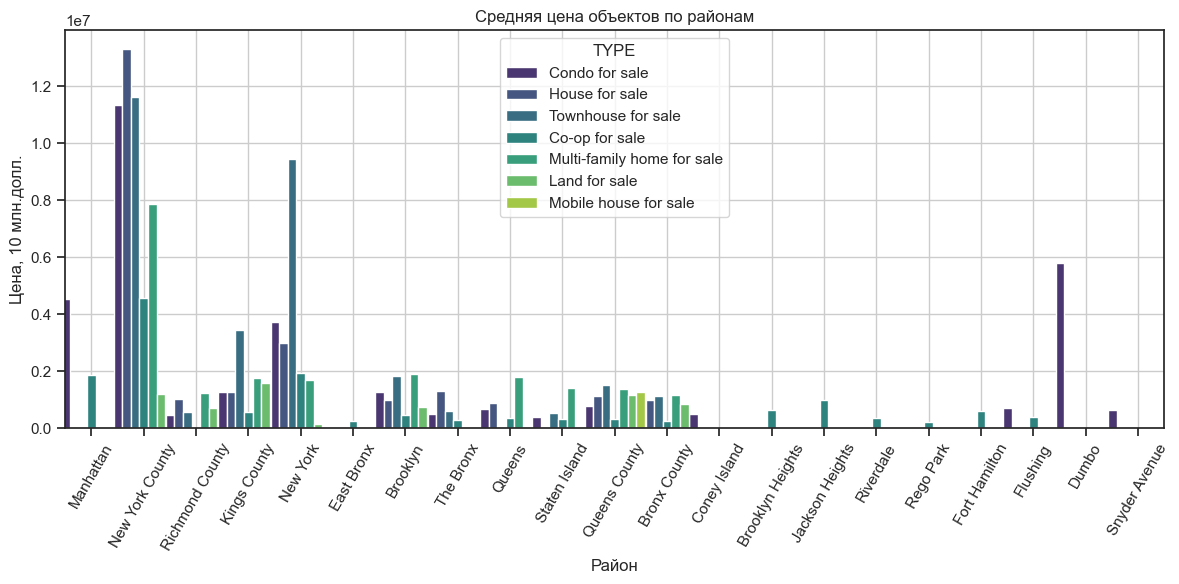

In [16]:
# Самые дорогие районы - New York и New York County
# Самые дешевые - Bronx и Queens
# Brooklyn не так давно стал набирать популярность, поэтому там очевидно есть как новые дорогие объекты, так и старая дешевая недвижимость, из-за чего наблюдается большой разброс в ценах.

plt.figure(figsize=(12, 6))
sns.barplot(df_ltd, x='SUBLOCALITY', y='PRICE', hue='TYPE', estimator='mean', dodge=True, palette='viridis', errorbar=None, width=1.15)
plt.xticks(rotation=60)
plt.title('Средняя цена объектов по районам')
plt.xlabel('Район')
plt.ylabel('Цена, 10 млн.долл.')
plt.grid(True)
plt.tight_layout()
plt.show()

### Задание 1.5 Какой тип квартир самый популярный в разных районах?
В столбце SUBLOCALITY указан район расположения объектов недвижимости. Всего в этом столбце 21 разных районов. Однако некоторые из них содержат слишком маленькое количество наблюдений.

Оставьте только те районы (столбец SUBLOCALITY), количество наблюдений в которых больше или равно 100.
Для оставшихся районов сделайте barh plot, в котором для каждого района будет указана доля квартир разных видов (столбец TYPE).
Полученные значения отсортируйте по убыванию по доле квартир (Condo for sale).

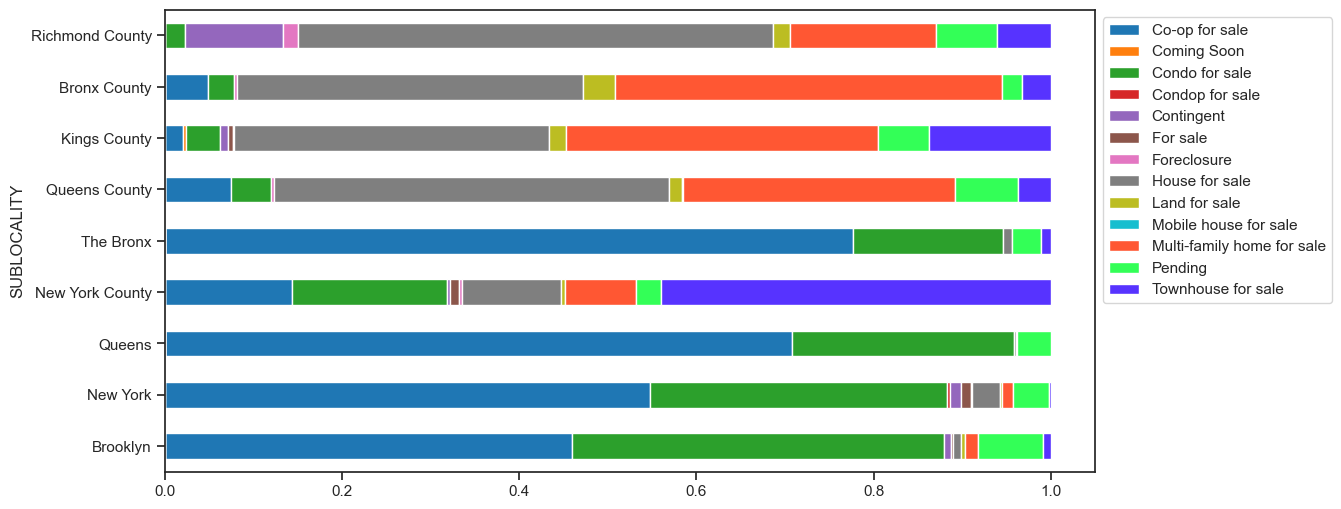

In [64]:
df_loclim = df[df['SUBLOCALITY'].isin(df['SUBLOCALITY'].value_counts()[df['SUBLOCALITY'].value_counts() >= 100].index)]
loc_type = df_loclim.groupby('SUBLOCALITY')['TYPE'].value_counts(normalize=True).unstack().sort_values(by='Condo for sale', ascending=False)
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FF5733', '#33FF57', '#5733FF']
loc_type.plot(kind='barh', stacked=True, figsize=(12, 6), color=sns.color_palette(custom_colors))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Задание 2. Работа с выбросами
### Задание 2.1 Поиск выбросов
В нашем датасете есть два признака, в которых могут находиться выбросы — PRICE и PROPERTYSQFT

Почему их не может быть в других числовых переменных?
Используя boxplot идентифицируйте выбросы в обеих переменных в зависимости от типа недвижимости (TYPE).

In [ ]:
# Прежде всего я не согласна, что выбросы не могут находиться в других числовых переменных: если смотреть графики выше, 
# то как минимум подозрительно выглядит, когда число ванных комнат превышает число спален.
# Однако данные выбросы можно заметить только при парном сопоставлении признаков и приминении здравого рассуждения.
# Также выбросы вполне могут встретиться и в широте и долготе, например, при ошибочном вводе данных. Просто нам повезло их не иметь.

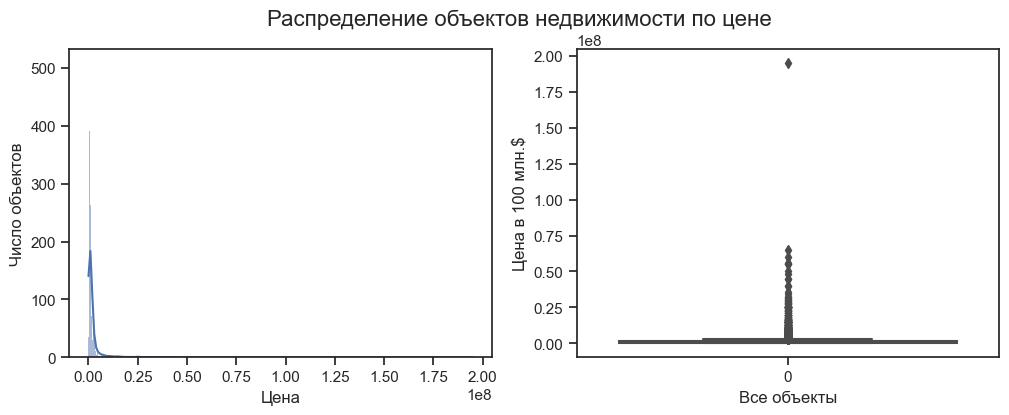

In [95]:
# Наблюдается явный ценовой выброс (значение около 200_000_000), избавимся от него до построения зависимости по типам недвижимости

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Распределение объектов недвижимости по цене', fontsize=16)
sns.histplot(df['PRICE'], kde=True, ax=ax[0])
ax[0].set_xlabel('Цена')
ax[0].set_ylabel('Число объектов')
sns.boxplot(df['PRICE'], ax=ax[1])
ax[1].set_xlabel('Все объекты')
ax[1].set_ylabel('Цена в 100 млн.$')
plt.show()

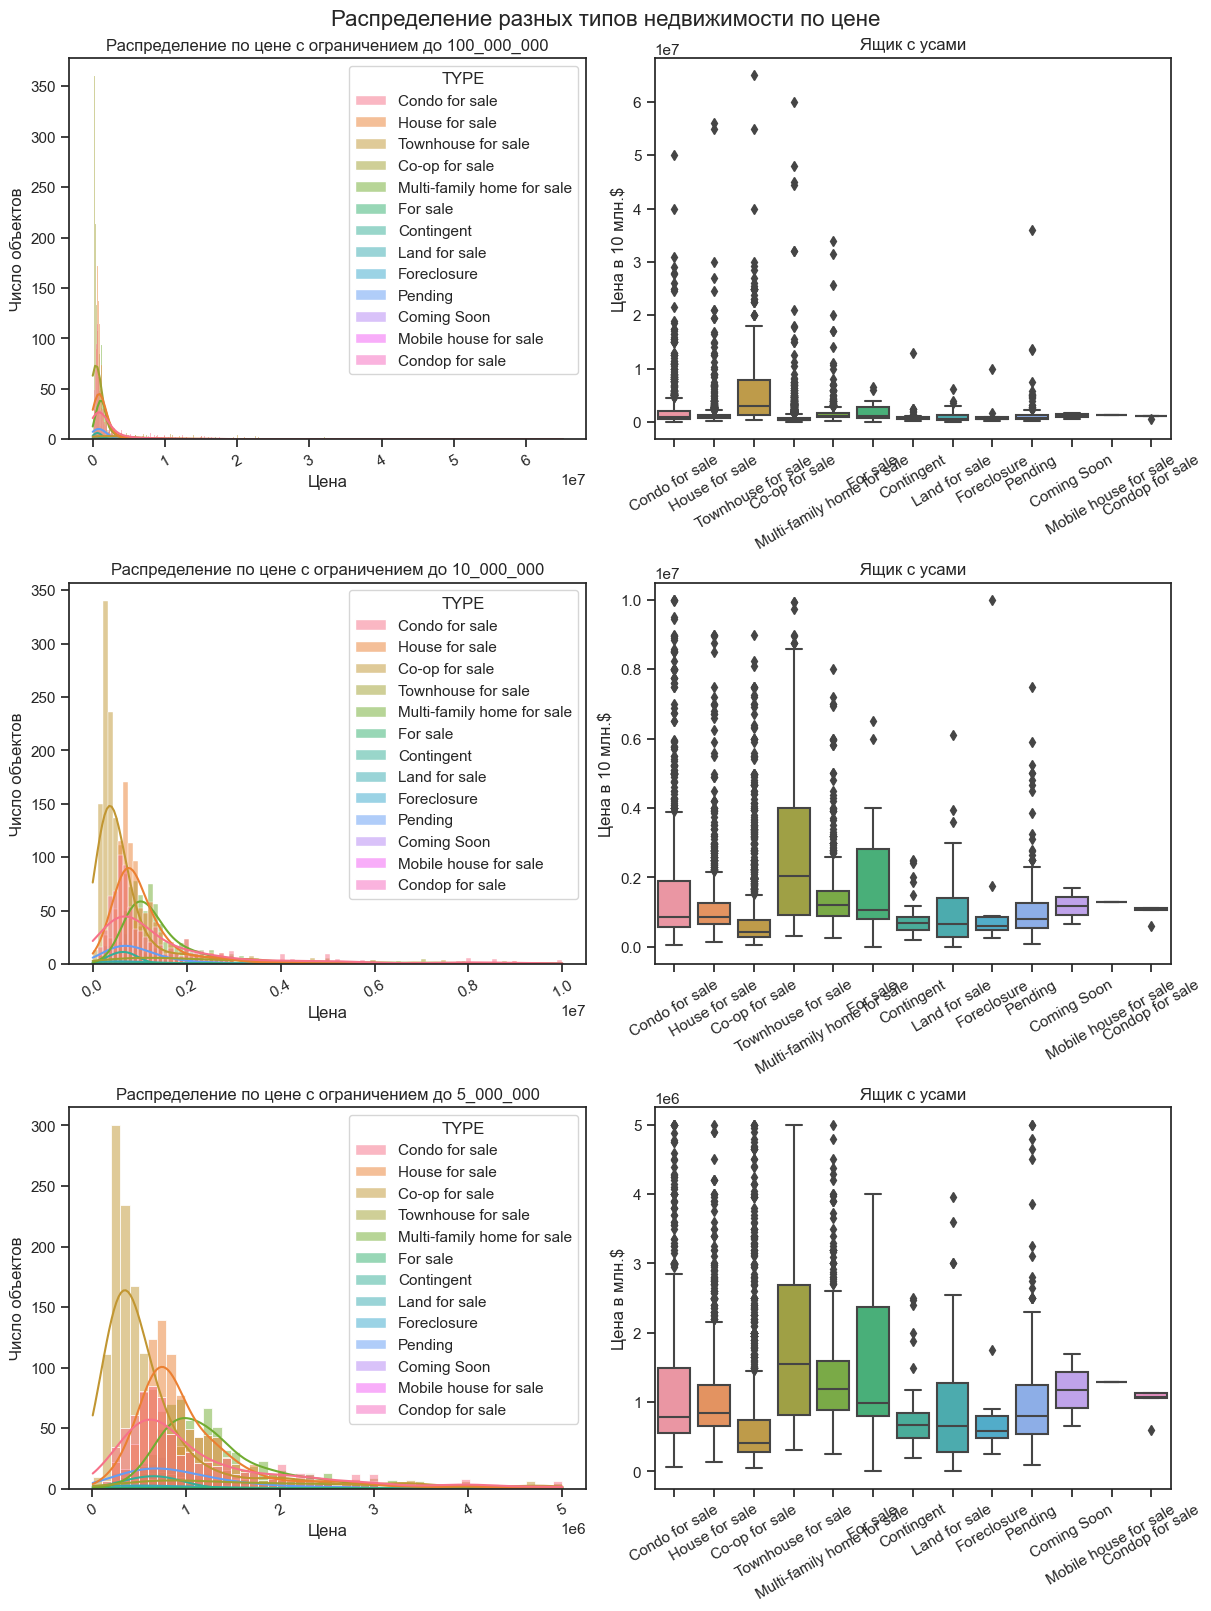

In [104]:
fig, ax = plt.subplots(3, 2, figsize=(12,16), layout="constrained")
fig.suptitle('Распределение разных типов недвижимости по цене', fontsize=16)
sns.histplot(df[df['PRICE'] < 100_000_000], x='PRICE', hue='TYPE', kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Распределение по цене с ограничением до 100_000_000')
ax[0, 0].set_xlabel('Цена')
ax[0, 0].set_ylabel('Число объектов')
sns.boxplot(df[df['PRICE'] < 100_000_000], x='TYPE', y='PRICE', ax=ax[0, 1])
ax[0, 1].set_title('Ящик с усами')
ax[0, 1].set_xlabel(None)
ax[0, 1].set_ylabel('Цена в 10 млн.$')
sns.histplot(df[df['PRICE'] < 10_000_000], x='PRICE', hue='TYPE', kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Распределение по цене с ограничением до 10_000_000')
ax[1, 0].set_xlabel('Цена')
ax[1, 0].set_ylabel('Число объектов')
sns.boxplot(df[df['PRICE'] < 10_000_000], x='TYPE', y='PRICE', ax=ax[1, 1])
ax[1, 1].set_title('Ящик с усами')
ax[1, 1].set_xlabel(None)
ax[1, 1].set_ylabel('Цена в 10 млн.$')
sns.histplot(df[df['PRICE'] < 5_000_000], x='PRICE', hue='TYPE', kde=True, ax=ax[2, 0])
ax[2, 0].set_title('Распределение по цене с ограничением до 5_000_000')
ax[2, 0].set_xlabel('Цена')
ax[2, 0].set_ylabel('Число объектов')
sns.boxplot(df[df['PRICE'] < 5_000_000], x='TYPE', y='PRICE', ax=ax[2, 1])
ax[2, 1].set_title('Ящик с усами')
ax[2, 1].set_xlabel(None)
ax[2, 1].set_ylabel('Цена в млн.$')

for axes_row in ax:
    for axes in axes_row:
        axes.tick_params(axis='x', labelrotation=30)

plt.show()

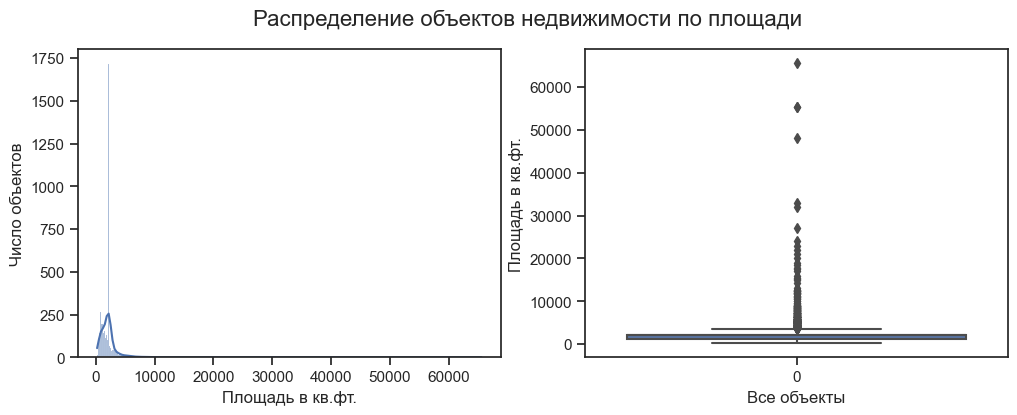

In [101]:
# Аномальное число значений 1621 с площадью 2184.207862 сразу стоит удалить (хорошо видно на общей гистограмме)

fig, ax = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Распределение объектов недвижимости по площади', fontsize=16)
sns.histplot(df['PROPERTYSQFT'], kde=True, ax=ax[0])
ax[0].set_xlabel('Площадь в кв.фт.')
ax[0].set_ylabel('Число объектов')
sns.boxplot(df['PROPERTYSQFT'], ax=ax[1])
ax[1].set_xlabel('Все объекты')
ax[1].set_ylabel('Площадь в кв.фт.')
plt.show()

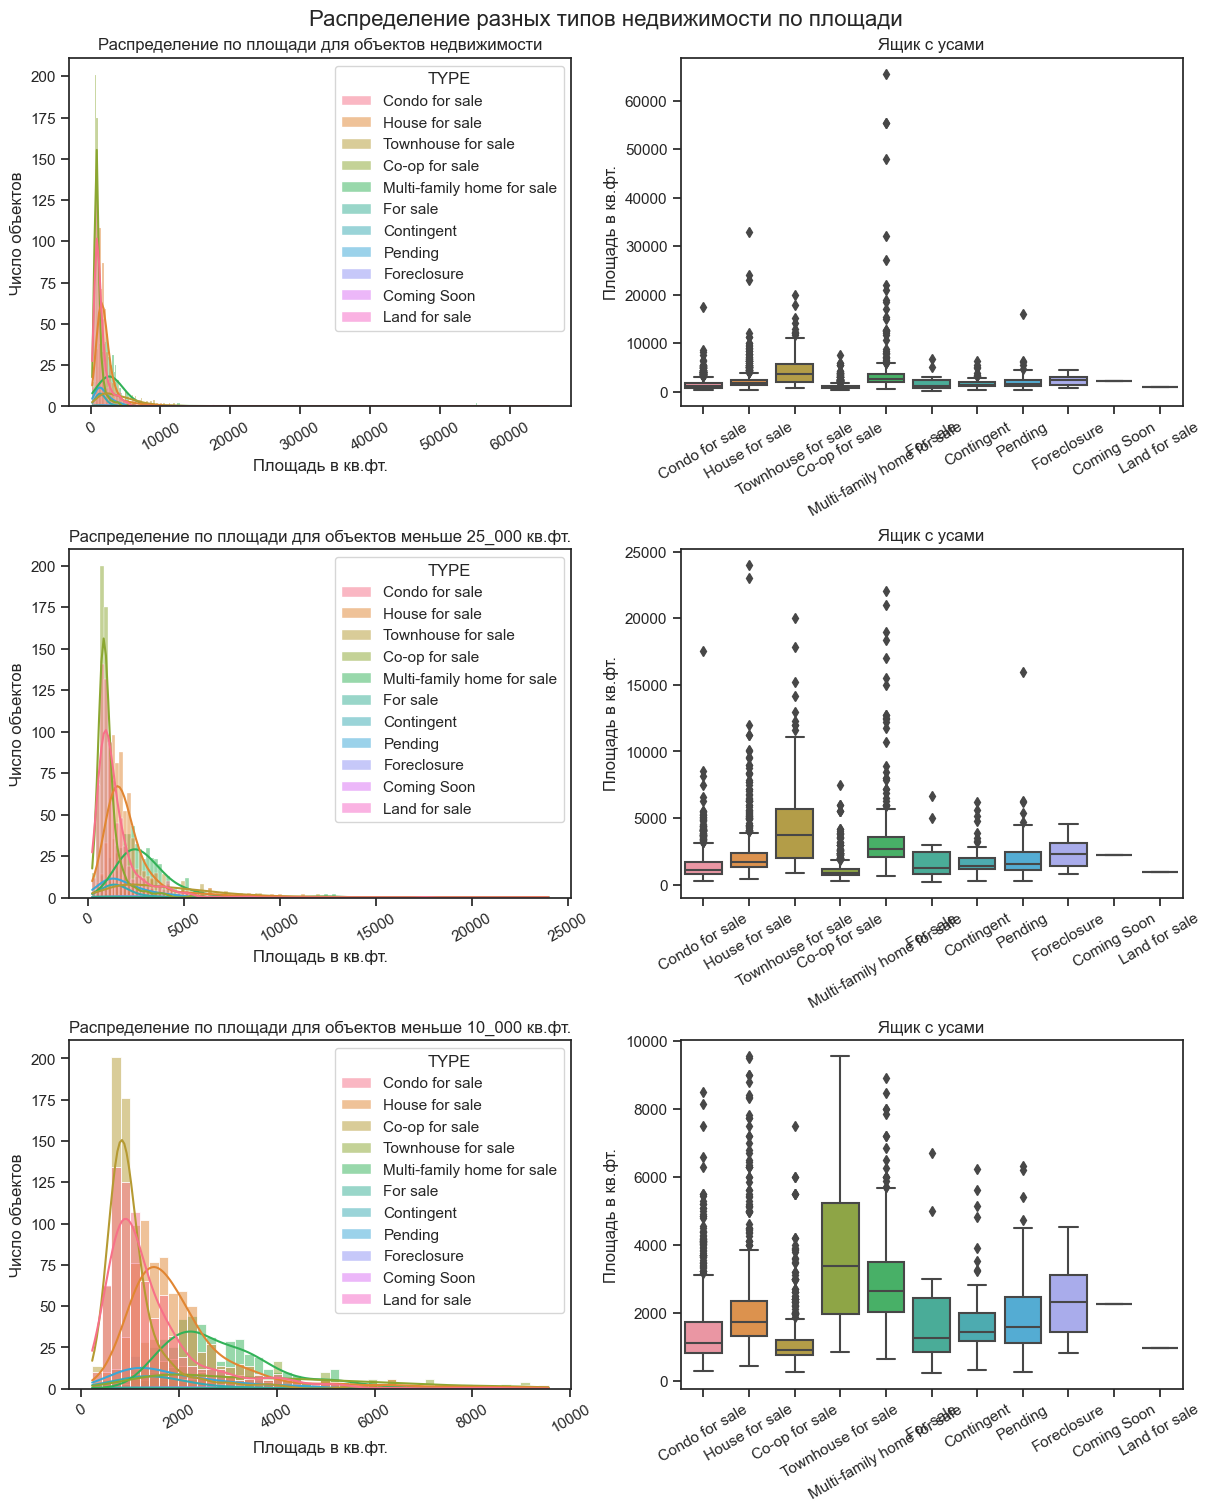

In [107]:
fig, ax = plt.subplots(3, 2, figsize=(12,15), layout='constrained')
fig.suptitle('Распределение разных типов недвижимости по площади', fontsize=16)
sns.histplot(df[df['PROPERTYSQFT'] != 2184.207862], x='PROPERTYSQFT', hue='TYPE', kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Распределение по площади для объектов недвижимости')
ax[0, 0].set_xlabel('Площадь в кв.фт.')
ax[0, 0].set_ylabel('Число объектов')
sns.boxplot(df[df['PROPERTYSQFT'] != 2184.207862], x='TYPE', y='PROPERTYSQFT', ax=ax[0, 1])
ax[0, 1].set_title('Ящик с усами')
ax[0, 1].set_xlabel(None)
ax[0, 1].set_ylabel('Площадь в кв.фт.')
sns.histplot(df[(df['PROPERTYSQFT'] != 2184.207862) & (df['PROPERTYSQFT'] < 25_000)], x='PROPERTYSQFT', hue='TYPE', kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Распределение по площади для объектов меньше 25_000 кв.фт.')
ax[1, 0].set_xlabel('Площадь в кв.фт.')
ax[1, 0].set_ylabel('Число объектов')
sns.boxplot(df[(df['PROPERTYSQFT'] != 2184.207862) & (df['PROPERTYSQFT'] < 25_000)], x='TYPE', y='PROPERTYSQFT', ax=ax[1, 1])
ax[1, 1].set_title('Ящик с усами')
ax[1, 1].set_xlabel(None)
ax[1, 1].set_ylabel('Площадь в кв.фт.')
sns.histplot(df[(df['PROPERTYSQFT'] != 2184.207862) & (df['PROPERTYSQFT'] < 10_000)], x='PROPERTYSQFT', hue='TYPE', kde=True, ax=ax[2, 0])
ax[2, 0].set_title('Распределение по площади для объектов меньше 10_000 кв.фт.')
ax[2, 0].set_xlabel('Площадь в кв.фт.')
ax[2, 0].set_ylabel('Число объектов')
sns.boxplot(df[(df['PROPERTYSQFT'] != 2184.207862) & (df['PROPERTYSQFT'] < 10_000)], x='TYPE', y='PROPERTYSQFT', ax=ax[2, 1])
ax[2, 1].set_title('Ящик с усами')
ax[2, 1].set_xlabel(None)
ax[2, 1].set_ylabel('Площадь в кв.фт.')

for axes_row in ax:
    for axes in axes_row:
        axes.tick_params(axis='x', labelrotation=30)

plt.show()

### Задание 2.2 Удаление выбросов
Удалите выбросы в датасете по переменной PRICE, которые были обнаружены в задании 2.1.

После удаления выведите bar plot, который будет визуализировать среднюю стоимость недвижимости в зависимости от типа недвижимости.

In [81]:
def remove_outliers(group):
    z_scores = np.abs((group['PRICE'] - group['PRICE'].mean()) / group['PRICE'].std())
    return group[z_scores <= 3]

df_no_outliers = df.groupby('TYPE').apply(remove_outliers)
df_no_outliers.reset_index(drop=True, inplace=True)

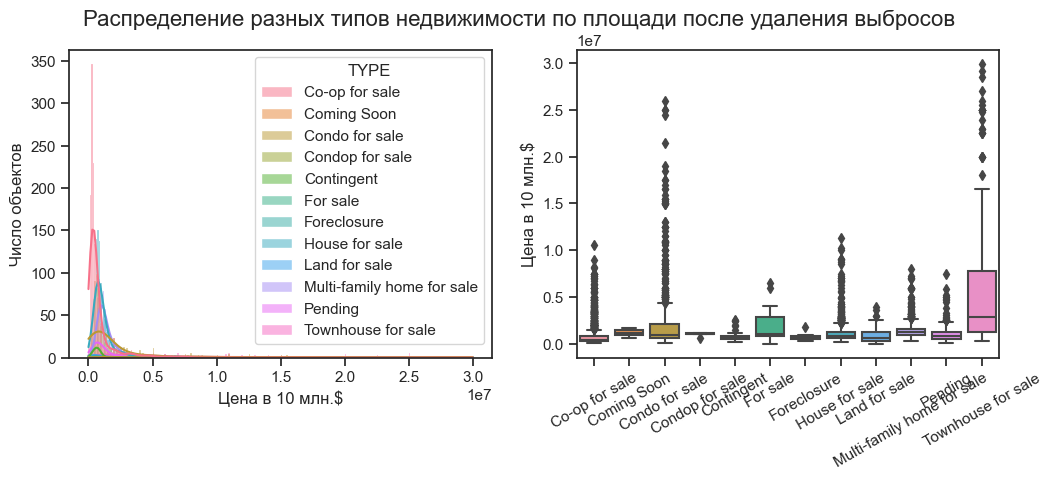

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Распределение разных типов недвижимости по площади после удаления выбросов', fontsize=16)
sns.histplot(df_no_outliers, x='PRICE', hue='TYPE', kde=True, ax=ax[0])
ax[0].set_xlabel('Цена в 10 млн.$')
ax[0].set_ylabel('Число объектов')
sns.boxplot(df_no_outliers, x='TYPE', y='PRICE', ax=ax[1])
ax[1].tick_params(axis='x', labelrotation=30)
ax[1].set_xlabel(None)
ax[1].set_ylabel('Цена в 10 млн.$')

plt.show()

Text(0, 0.5, 'Стоимость в млн.$')

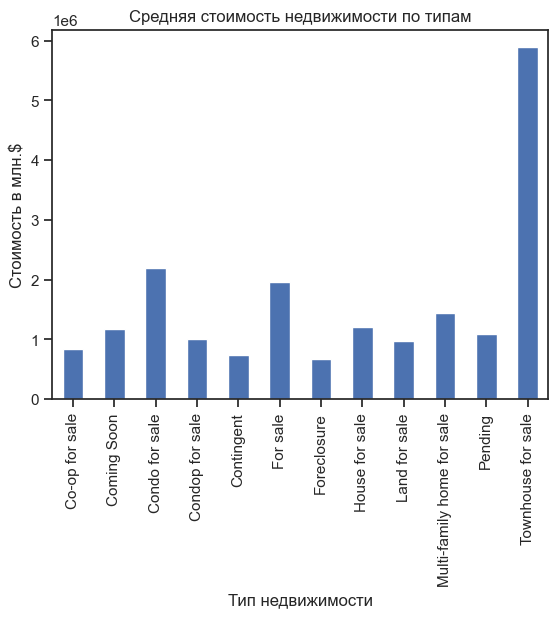

In [115]:
df_no_outliers.groupby('TYPE')['PRICE'].mean().plot(kind='bar', )
plt.title('Средняя стоимость недвижимости по типам')
plt.xlabel('Тип недвижимости')
plt.ylabel('Стоимость в млн.$')

### Задание 2.3 Поиск выбросов с помощью правила трёх сигм
С помощью правила трех сигм найдите, какие значения являются экстремальными (выбросами) в столбце PROPERTYSQFT. Результат выведите в текстовом виде и сравните с результатом, полученным с помощью box plot в задании 2.1.

In [154]:
# Исключим из рассмотрения'PROPERTYSQFT' = 2184.207862

df_cleaned = df[df['PROPERTYSQFT'] != 2184.207862]
dev = (df_cleaned['PROPERTYSQFT'] - df_cleaned['PROPERTYSQFT'].mean()).abs()
std = df_cleaned['PROPERTYSQFT'].std()

# Выводим выбросы на экран:
outliers = df_cleaned[dev > 3 * std]
print("Площади, выходящие за границы 3 сигм:")
print(outliers.PROPERTYSQFT.sort_values().values)

Площади, выходящие за границы 3 сигм:
[10940. 11110. 11250. 11250. 11638. 11760. 12000. 12000. 12000. 12200.
 12300. 12460. 12492. 12720. 12733. 13000. 14175. 15000. 15200. 15500.
 16000. 17000. 17545. 17860. 18400. 18936. 20000. 21000. 22035. 23027.
 24000. 27152. 32000. 33000. 48000. 55300. 55300. 65535.]


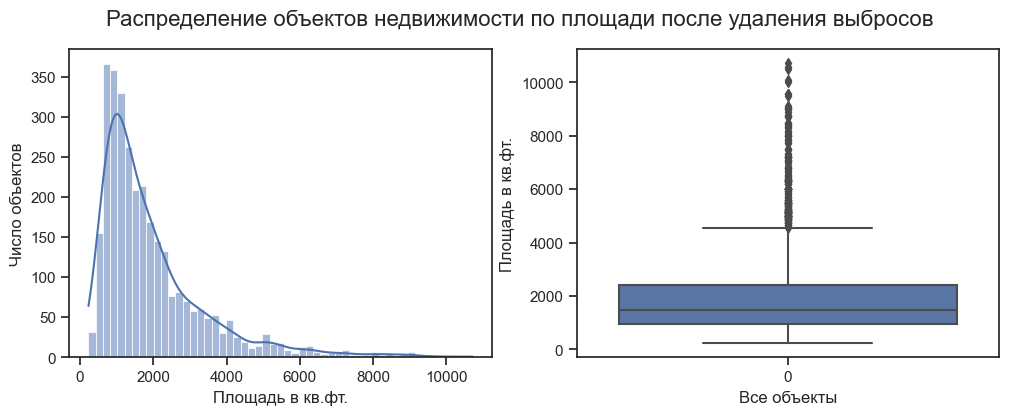

In [129]:
df_trimmed = df_cleaned[~ (dev > 3 * std)]

fig, ax = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Распределение объектов недвижимости по площади после удаления выбросов', fontsize=16)
sns.histplot(df_trimmed['PROPERTYSQFT'], kde=True, ax=ax[0])
ax[0].set_xlabel('Площадь в кв.фт.')
ax[0].set_ylabel('Число объектов')
sns.boxplot(df_trimmed['PROPERTYSQFT'], ax=ax[1])
ax[1].set_xlabel('Все объекты')
ax[1].set_ylabel('Площадь в кв.фт.')
plt.show()

### Задание 2.4 Выделение выбросов
Мы нашли значение, после которого все наши наблюдения можно назвать выбросами.

Подсветите их. Для этого создайте scatter plot (столбцы PROPERTYSQFT и PRICE) в котором все точки выше этого значения PROPERTYSQFT будут помечены красным цветом.

После этого удалите эти значения из датасета (сортировка по переменной PROPERTYSQFT).

Отлично, теперь можем перейти к построению простой модели.

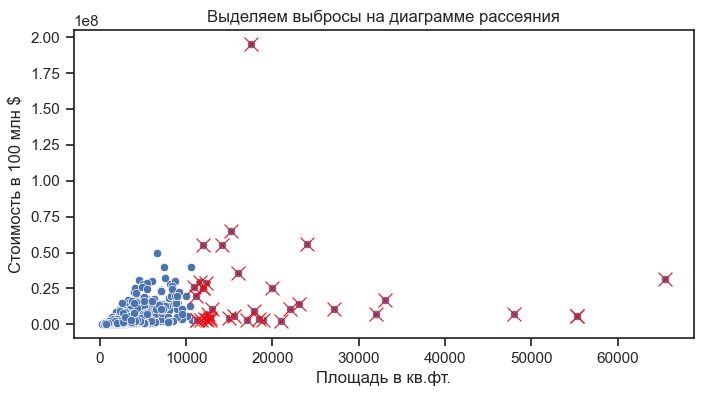

In [174]:
# Очищенный от выбросов датасет сохранен под df_trimmed

plt.figure(figsize=(8, 4))
sns.scatterplot(df_cleaned, x='PROPERTYSQFT', y='PRICE')
sns.scatterplot(data=df_cleaned[df_cleaned['PROPERTYSQFT'] > df_trimmed['PROPERTYSQFT'].max()], x='PROPERTYSQFT', y='PRICE', color='red', marker='x', s=100)
plt.title('Выделяем выбросы на диаграмме рассеяния')
plt.xlabel('Площадь в кв.фт.')
plt.ylabel('Стоимость в 100 млн $')
plt.show()

## Задание 3. Создание простой модели, визуализация результатов работы алгоритма
### Задание 3.1 Создание модели парной регрессии
В рамках других курсах вы проходили довольно много различных моделей и хорошо в них ориентируйтесь. Давайте сейчас попробуем посмотреть, в чем нам может помочь визуализация при интерпретации моделей.

Используя любую удобную для вас библиотеку, создайте модель простейшей парной регрессии. В качестве зависимой переменной используйте PRICE, в качестве независимой - PROPERTYSQFT. Полученные коэффициенты выведите и кратко опишите (логичным ли получился результат?)

In [175]:
from sklearn.linear_model import LinearRegression

X = df_trimmed[['PROPERTYSQFT']]
y = df_trimmed['PRICE']

model = LinearRegression()

model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f'Intercept (beta_0): {beta_0}')
print(f'Coefficient (beta_1): {beta_1}')

Intercept (beta_0): -983292.8874460193
Coefficient (beta_1): 1441.0201998074351


In [ ]:
# Логично, что при увеличении площади цена растет. Поскольку тип недвижимости не уточнен, в среднем цена растет на 1441$ за каждый дополнительный кв.фт.
# Отрицательное значение пересечения с 0 площадью довольно бессмысленно, так же как невозможна и продажа недвижимости с 0 площадью.

### Задание 3.2 Визуализация результата
Когда мы работаем с парной регрессией, нам интересно отобразить полученные результаты на графике и визуально оценить их.

Создайте scatter plot, где по оси x будет находится PROPERTYSQFT, а по оси y - PRICE. Добавьте на этот график прямую регрессионного уравнения, которая у нас получилась.

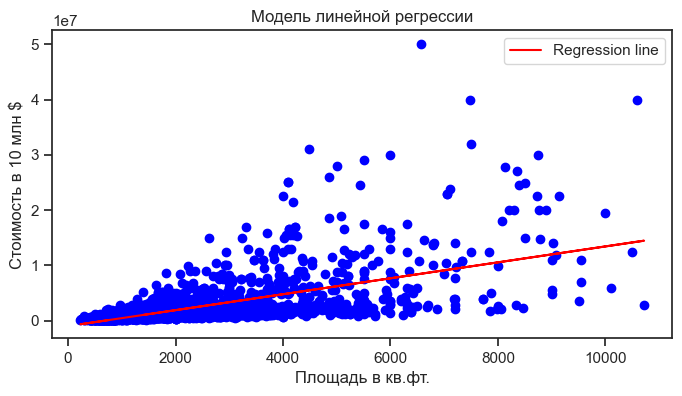

In [173]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.title('Модель линейной регрессии')
plt.xlabel('Площадь в кв.фт.')
plt.ylabel('Стоимость в 10 млн $')
plt.legend()
plt.show()

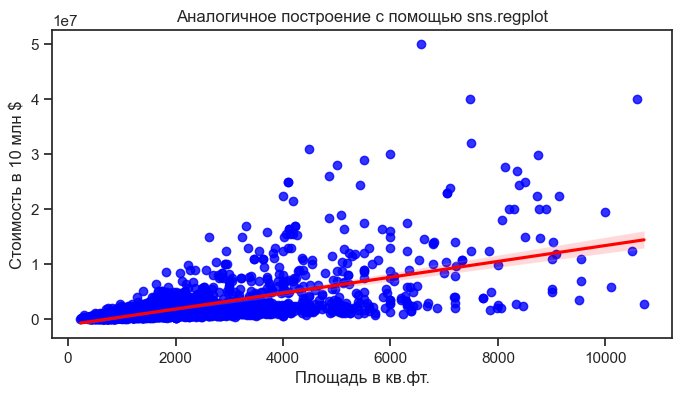

In [182]:
plt.figure(figsize=(8, 4))
sns.regplot(x='PROPERTYSQFT', y='PRICE', data=df_trimmed, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Аналогичное построение с помощью sns.regplot')
plt.xlabel('Площадь в кв.фт.')
plt.ylabel('Стоимость в 10 млн $')
plt.show()